# Read log file

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from ipm_util import log_to_dataframe

In [2]:
%time df_all = log_to_dataframe('./wrf-parallel-io.ipm.xml')
df_all.shape

CPU times: user 658 ms, sys: 46.6 ms, total: 705 ms
Wall time: 755 ms


(288, 12)

# Explore results

In [3]:
df_all.head()

name,MPI_Init,MPI_Finalize,MPI_Comm_rank,MPI_Comm_size,MPI_Isend,MPI_Irecv,MPI_Wait,MPI_Bcast,MPI_Allreduce,MPI_Comm_dup,MPI_Comm_split,MPI_Comm_free
rank,,,,,,,,,,,,
0,0.0,0.0,0.006183,0.000011,4.9016,0.22080,961.14,0.66612,10.101,0.61368,0.059662,0.000197
1,0.0,0.0,0.003720,0.000014,7.5578,0.23448,867.33,1.67330,10.126,0.61358,0.058735,0.000175
2,0.0,0.0,0.004656,0.000012,7.6293,0.26965,948.55,1.65730,10.128,0.61507,0.057029,0.000181
3,0.0,0.0,0.004112,0.000018,7.4322,0.27827,1000.60,1.65120,10.129,0.61459,0.057377,0.000388
4,0.0,0.0,0.004510,0.000012,7.6445,0.26672,982.37,1.67440,10.108,0.61479,0.057103,0.000194


In [4]:
df = df_all.loc[:, df_all.mean() >= 0.1]
df.head()

name,MPI_Isend,MPI_Irecv,MPI_Wait,MPI_Bcast,MPI_Allreduce,MPI_Comm_dup
rank,,,,,,
0,4.9016,0.22080,961.14,0.66612,10.101,0.61368
1,7.5578,0.23448,867.33,1.67330,10.126,0.61358
2,7.6293,0.26965,948.55,1.65730,10.128,0.61507
3,7.4322,0.27827,1000.60,1.65120,10.129,0.61459
4,7.6445,0.26672,982.37,1.67440,10.108,0.61479


In [5]:
df.describe()

name,MPI_Isend,MPI_Irecv,MPI_Wait,MPI_Bcast,MPI_Allreduce,MPI_Comm_dup
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,8.276399,0.424000,740.221563,1.388606,10.094619,0.191760
std,1.370222,0.109652,193.525511,0.190040,0.056589,0.169596
min,4.546200,0.194780,282.960000,0.666120,9.895400,0.011072
25%,7.934625,0.365380,603.632500,1.279200,10.063500,0.127515
50%,8.423050,0.432735,764.035000,1.327350,10.103000,0.134875
75%,8.800425,0.515797,900.360000,1.421925,10.133250,0.174597
max,12.410000,0.701540,1145.900000,2.304800,10.192000,0.615070


# Plotting

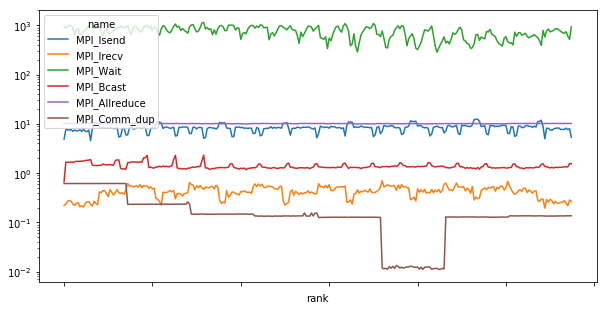

In [6]:
df.plot(logy=True, figsize=[10, 5])

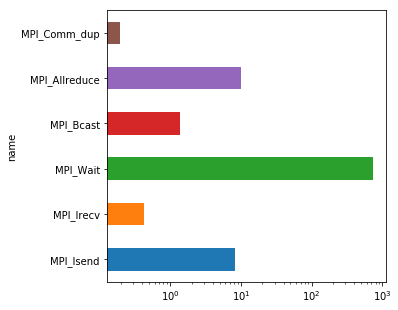

In [7]:
df.mean().plot.barh(figsize=(5, 5), logx=True)

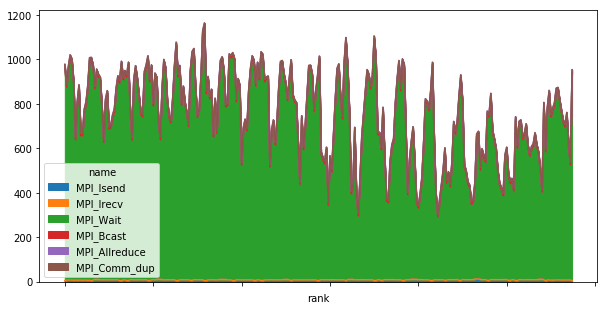

In [8]:
df.plot.area(figsize=[10, 5])

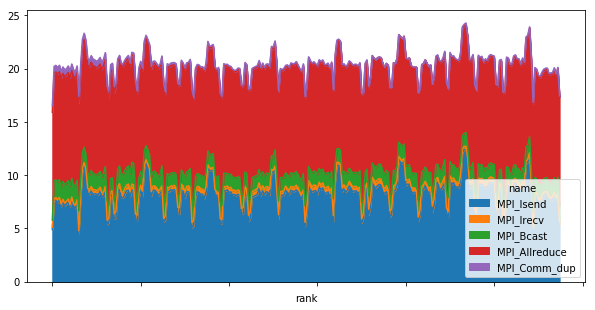

In [9]:
df.drop('MPI_Wait', axis=1).plot.area(figsize=[10, 5])